# Menyiapkan Library dan Dataset

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb 

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
os.chdir('drive/My Drive/Datasets')
os.listdir('.')

['iris.csv', 'heart.csv', 'pima-indians-diabetes.csv', 'sonar.csv']

# EDA dan Feature Engineering

In [3]:
# membaca data 5 baris diawal
dataset_diabetes = pd.read_csv('pima-indians-diabetes.csv')
dataset_diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
# melihat informasi dari dataset
dataset_diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
# melihat informasi statistik deskriptif dari dataset
dataset_diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
# melihat jumlah data perkategori label
dataset_diabetes['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [7]:
# melihat informasi nama-nama kolom dataset
dataset_diabetes.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


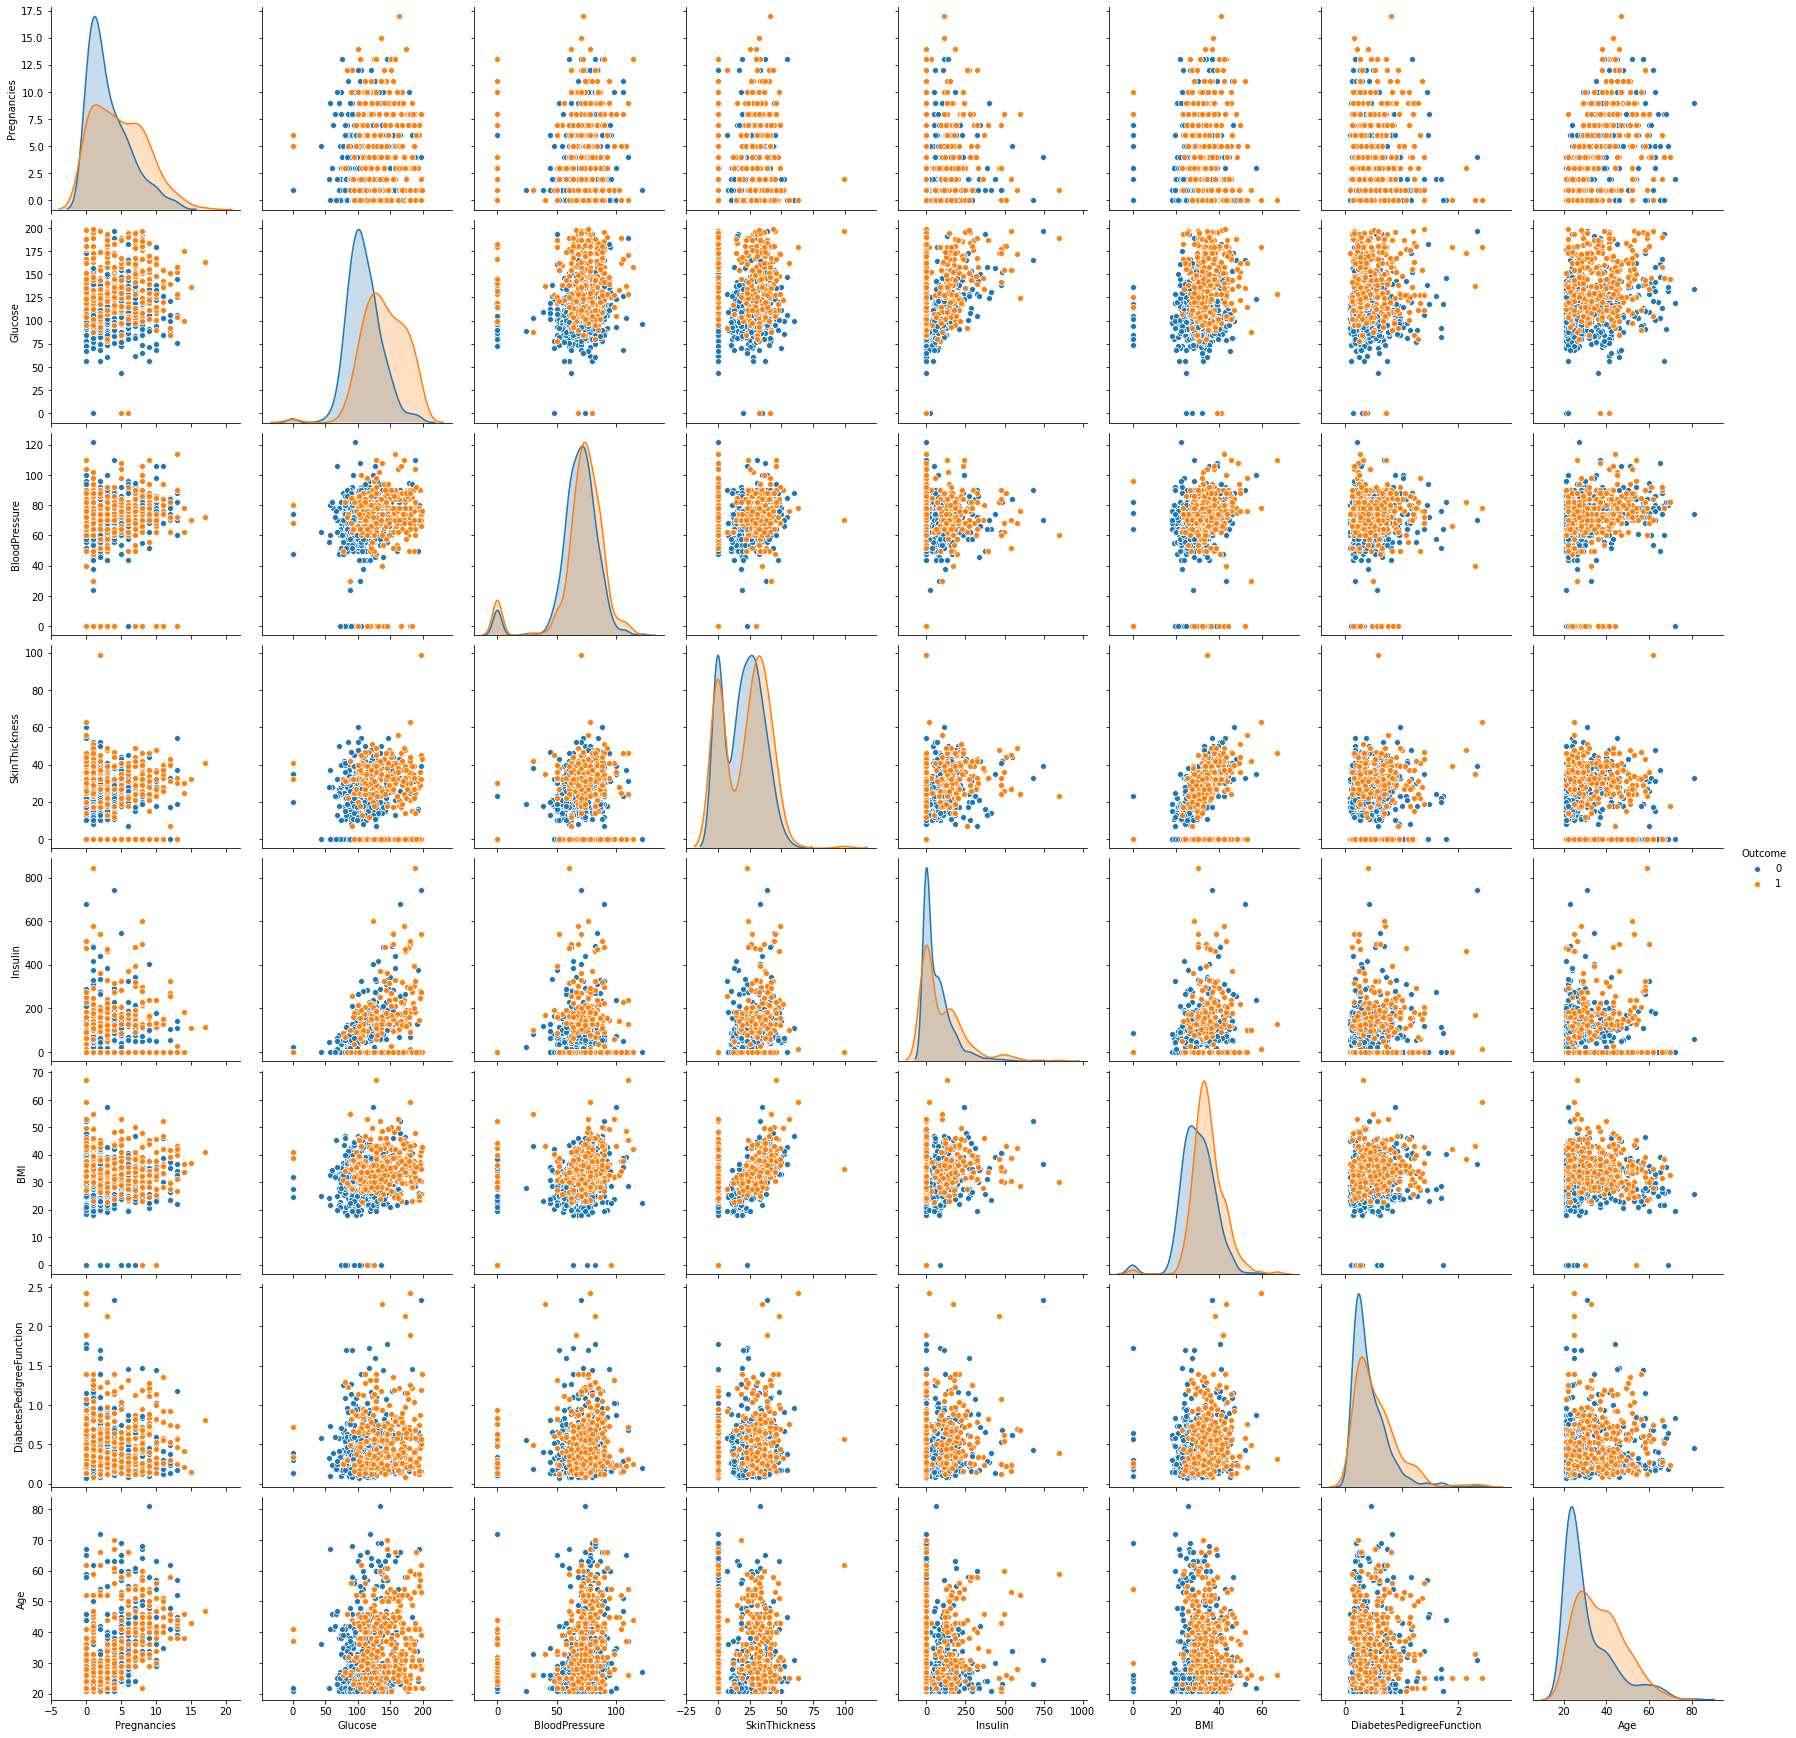

In [8]:
# menampilkan visualisasi pola penyebaran korelasi antar feature dataset
sb.pairplot(dataset_diabetes, hue='Outcome', size=3)
plt.show()

In [9]:
'''
Berdasrkan grafik gambar korelasi diatas terdapat anomali yang melihatkan 
adanya penyebaran data pada nilai nol (missing value) yang ditandai penyebaran 
data yang berpola tegak lurus, sehingga perlu dilakukan
rekayasa feature
'''

# memasukkan nama kolom feature ke dalam variable
col_feature = dataset_diabetes.columns[:-1]

# menampilkan data bernilai nol (kosong)
for nama in col_feature:
  print(f'kolom - {nama} - yang berisi nol sebanyak : {len(dataset_diabetes[dataset_diabetes[nama] == 0])}')

kolom - Pregnancies - yang berisi nol sebanyak : 111
kolom - Glucose - yang berisi nol sebanyak : 5
kolom - BloodPressure - yang berisi nol sebanyak : 35
kolom - SkinThickness - yang berisi nol sebanyak : 227
kolom - Insulin - yang berisi nol sebanyak : 374
kolom - BMI - yang berisi nol sebanyak : 11
kolom - DiabetesPedigreeFunction - yang berisi nol sebanyak : 0
kolom - Age - yang berisi nol sebanyak : 0


In [10]:
# mengubah data feature yang bernilai 0 (yang anomaly) menjadi NaN
dataset_diabetes[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = dataset_diabetes[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [11]:
# merekayasa nilai feture NaN menjadi nilai rata-rata pada masing-masing feature

col_feature_nan = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']

for n in col_feature_nan: 
  dataset_diabetes[n] = dataset_diabetes[n].fillna(dataset_diabetes[n].mean())

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


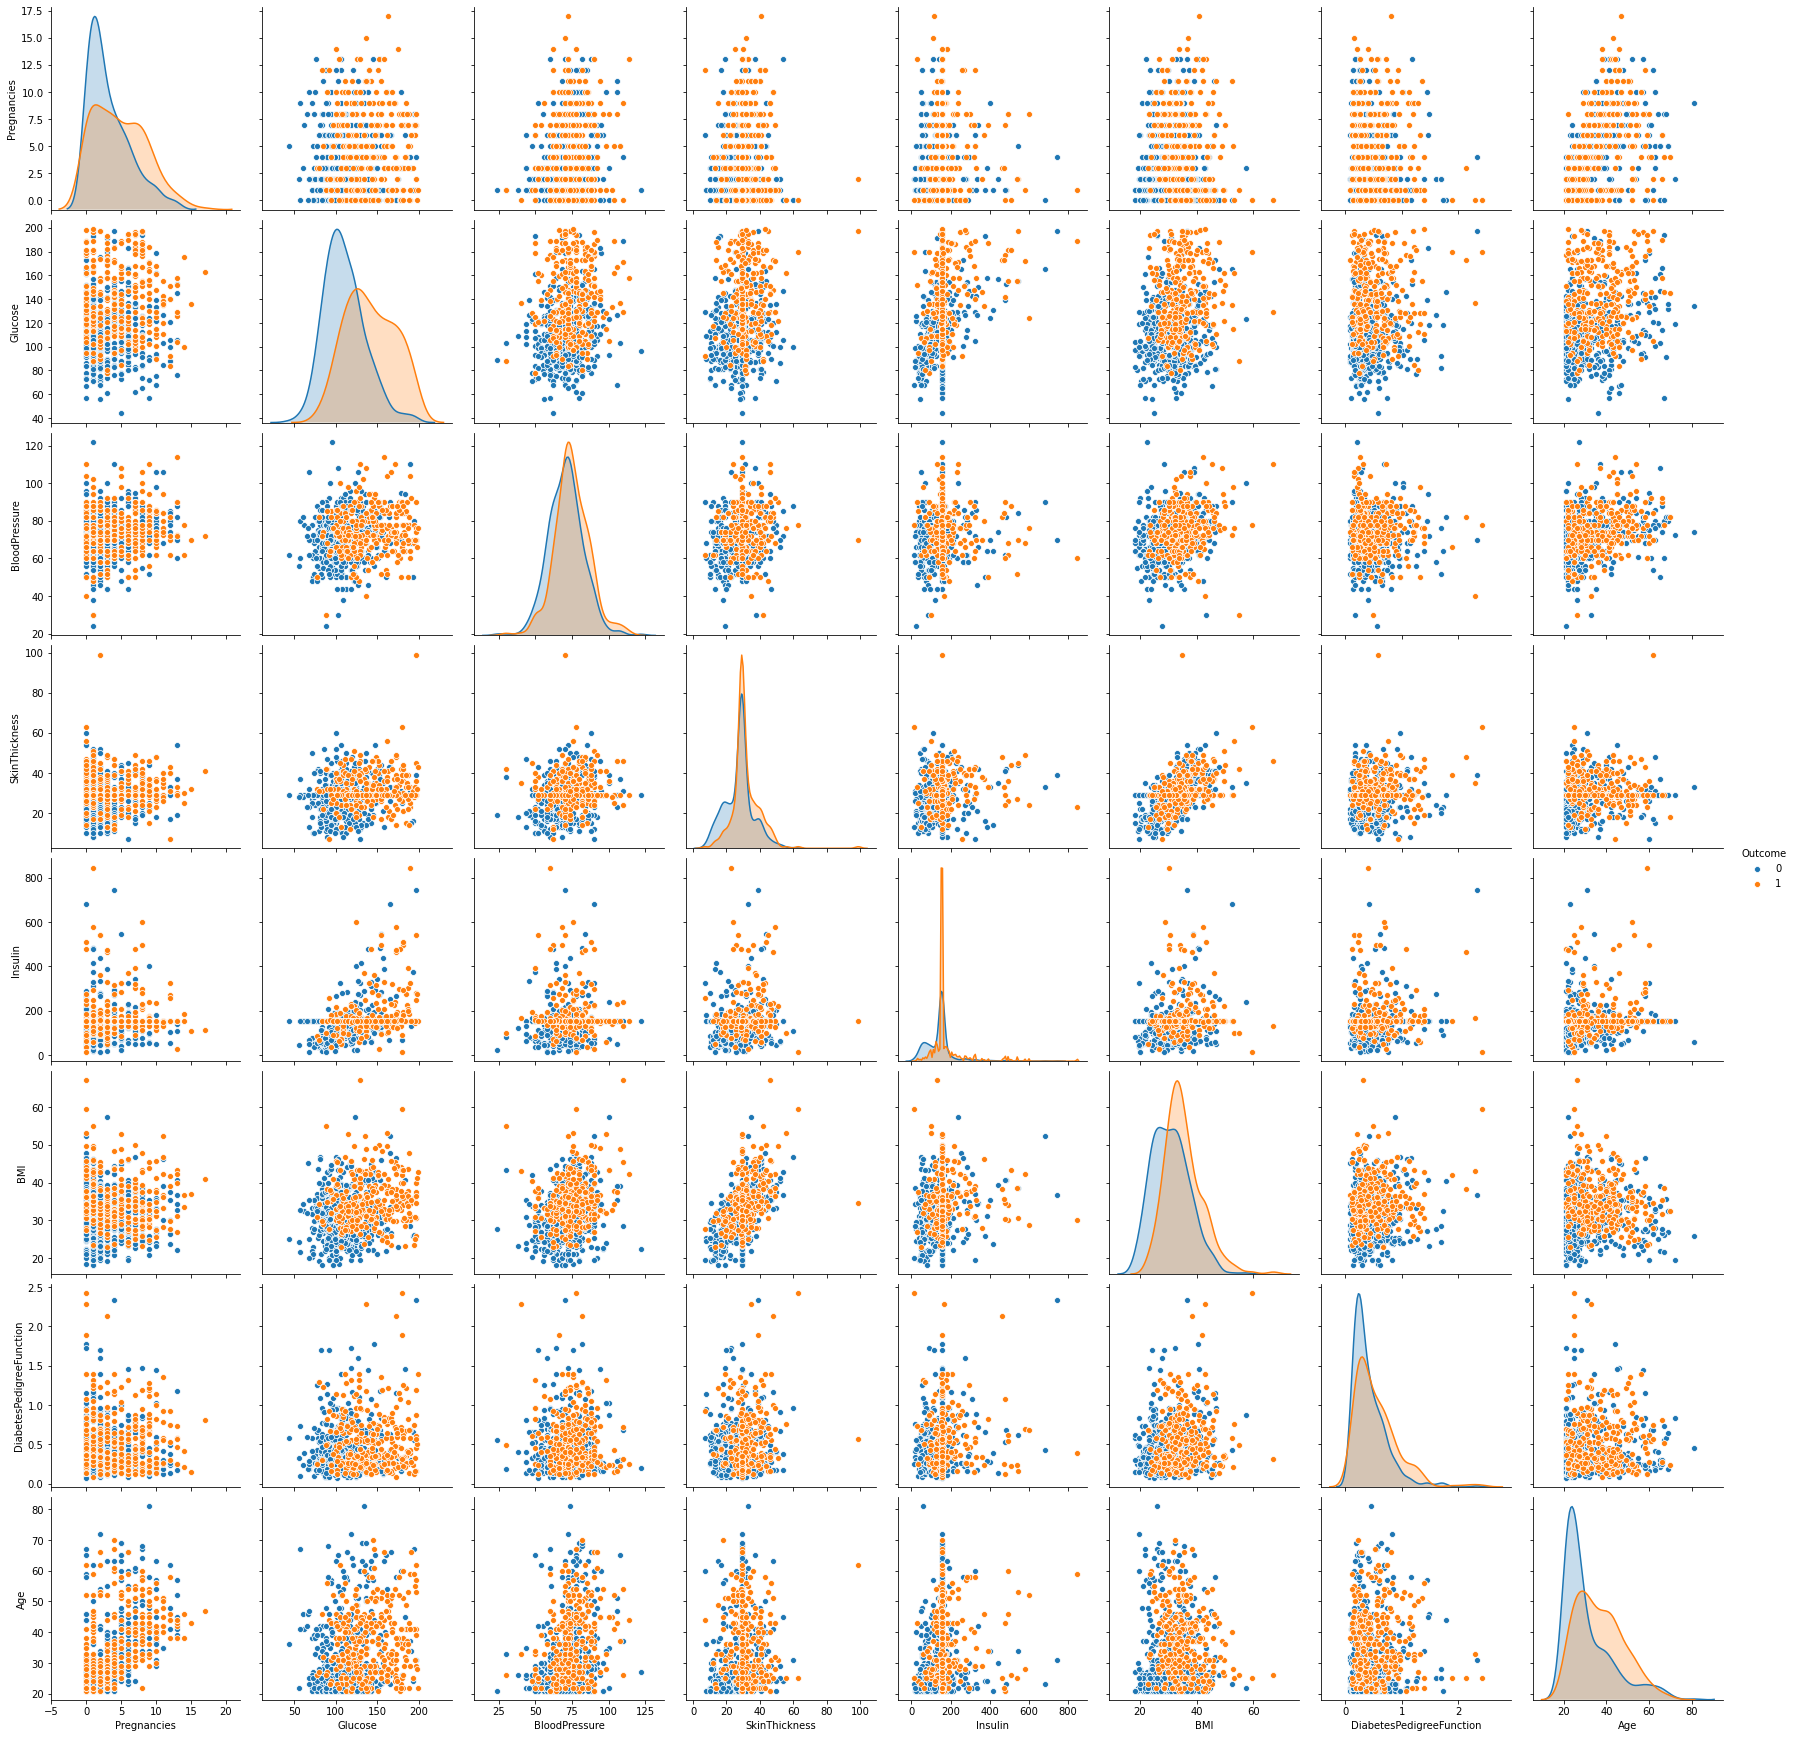

In [12]:
# menampilkan visualisasi pola penyebaran korelasi antar feature dataset setelah direkayasa
sb.pairplot(dataset_diabetes, hue='Outcome', size=3)
plt.show()

In [111]:
# memisahkan data feature dan test
feature = dataset_diabetes.drop(['Outcome'], axis=1)
label = dataset_diabetes['Outcome']

In [112]:
# melakukan scaling pada data feature
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer()
feature_scaled = scaler.fit_transform(feature.values)

In [144]:
# memisahkan data train dan test pada data feature dan label
from sklearn.model_selection import train_test_split
feature_train, feature_test, label_train, label_test = train_test_split(feature_scaled, label, test_size=0.2, random_state=300)

# Melatih Model

# KNN

In [145]:
# melatih model
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=95, p=2, leaf_size=35, algorithm='kd_tree', weights='distance')
knn_model.fit(feature_train, label_train)

# membuat prediksi
prediction_knn = knn_model.predict(feature_test)

# melihat akurasi cross_val_score pada data train
from sklearn.model_selection import cross_val_score
score = cross_val_score(knn_model, feature_train, label_train, cv=10, scoring='roc_auc')
print(score.mean())

0.821956376956377


In [146]:
from sklearn.metrics import classification_report
report_knn_gcv = classification_report(label_test, prediction_knn)
print(report_knn_gcv)

              precision    recall  f1-score   support

           0       0.78      0.92      0.85       101
           1       0.77      0.51      0.61        53

    accuracy                           0.78       154
   macro avg       0.78      0.72      0.73       154
weighted avg       0.78      0.78      0.77       154



In [147]:
# hasil confusion matrix dari hasil prediksi
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(label_test, prediction_knn, labels=[0, 1])
print('Confussion Matrixnya : \n', cm)

Confussion Matrixnya : 
 [[93  8]
 [26 27]]


# LoisticRegression

In [148]:
from sklearn.linear_model import LogisticRegression
logreg_model = LogisticRegression()
logreg_model.fit(feature_train, label_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [149]:
# prediksi
pred_logreg = logreg_model.predict(feature_test)

In [150]:
# melihat akurasi cross_val_score pada data train
from sklearn.model_selection import cross_val_score
score = cross_val_score(logreg_model, feature_train, label_train, cv=10, scoring='roc_auc')
print(score.mean())

0.8368714618714618


In [151]:
from sklearn.metrics import classification_report
report_logreg = classification_report(label_test, pred_logreg)
print(report_logreg)

              precision    recall  f1-score   support

           0       0.81      0.90      0.85       101
           1       0.76      0.58      0.66        53

    accuracy                           0.79       154
   macro avg       0.78      0.74      0.76       154
weighted avg       0.79      0.79      0.78       154



In [152]:
# hasil confusion matrix dari hasil prediksi
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(label_test, pred_logreg, labels=[0, 1])
print('Confussion Matrixnya : \n', cm)

Confussion Matrixnya : 
 [[91 10]
 [22 31]]


# Random Forest

In [153]:
from sklearn.ensemble import RandomForestClassifier
rfc_model = RandomForestClassifier(n_estimators=2600, max_depth=25, criterion='entropy', max_features='sqrt')
rfc_model.fit(feature_train, label_train)

# membuat prediksi
prediction_rfc = rfc_model.predict(feature_test)

# melihat akurasi cross_val_score pada data train
from sklearn.model_selection import cross_val_score
score = cross_val_score(rfc_model, feature_train, label_train, cv=10, scoring='roc_auc')
print(round(score.mean(), 2))

0.82


In [154]:
from sklearn.metrics import classification_report
report_rfc = classification_report(label_test, prediction_rfc)
print(report_rfc)

              precision    recall  f1-score   support

           0       0.81      0.88      0.84       101
           1       0.73      0.60      0.66        53

    accuracy                           0.79       154
   macro avg       0.77      0.74      0.75       154
weighted avg       0.78      0.79      0.78       154



In [155]:
# hasil confusion matrix dari hasil prediksi
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(label_test, prediction_rfc, labels=[0, 1])
print('Confussion Matrixnya : \n', cm)

Confussion Matrixnya : 
 [[89 12]
 [21 32]]


# SVC

In [176]:
from sklearn.svm import SVC
svc_model = SVC(kernel='rbf', C=1, gamma='auto')
svc_model.fit(feature_train, label_train)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [177]:
# prediksi
pred_svc = svc_model.predict(feature_test)

In [178]:
# melihat akurasi cross_val_score pada data train
from sklearn.model_selection import cross_val_score
score = cross_val_score(svc_model, feature_train, label_train, cv=10, scoring='roc_auc')
print(score.mean())

0.8191749916749916


In [179]:
from sklearn.metrics import classification_report
report_svc = classification_report(label_test, pred_svc)
print(report_svc)

              precision    recall  f1-score   support

           0       0.81      0.89      0.85       101
           1       0.74      0.60      0.67        53

    accuracy                           0.79       154
   macro avg       0.78      0.75      0.76       154
weighted avg       0.79      0.79      0.79       154



In [180]:
# hasil confusion matrix dari hasil prediksi
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(label_test, pred_svc, labels=[0, 1])
print('Confussion Matrixnya : \n', cm)

Confussion Matrixnya : 
 [[90 11]
 [21 32]]


# GNB

In [161]:
from sklearn.naive_bayes import GaussianNB
gnb_model = GaussianNB()
gnb_model.fit(feature_train, label_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [162]:
# prediksi
pred_gnb = gnb_model.predict(feature_test)

In [163]:
# melihat akurasi cross_val_score pada data train
from sklearn.model_selection import cross_val_score
score = cross_val_score(gnb_model, feature_train, label_train, cv=10, scoring='roc_auc')
print(score.mean())

0.8272215284715285


In [164]:
from sklearn.metrics import classification_report
report_gnb = classification_report(label_test, pred_gnb)
print(report_gnb)

              precision    recall  f1-score   support

           0       0.86      0.84      0.85       101
           1       0.71      0.74      0.72        53

    accuracy                           0.81       154
   macro avg       0.78      0.79      0.79       154
weighted avg       0.81      0.81      0.81       154



In [165]:
# hasil confusion matrix dari hasil prediksi
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(label_test, pred_gnb, labels=[0, 1])
print('Confussion Matrixnya : \n', cm)

Confussion Matrixnya : 
 [[85 16]
 [14 39]]


## XGBoost

In [168]:
import xgboost as xgb
xgb_model = xgb.XGBClassifier(colsample_bytree = 1, eta=0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 5)
xgb_model.fit(feature_train, label_train)

# prediksi
feature_pred = xgb_model.predict(feature_test)

# cross validation
from sklearn.model_selection import cross_val_score
score = cross_val_score(xgb_model, feature_train, label_train, cv=10, scoring='roc_auc')
print(score.mean())

0.8011405261405262


In [169]:
from sklearn.metrics import classification_report
report_xgb = classification_report(label_test, feature_pred)
print(report_xgb)

              precision    recall  f1-score   support

           0       0.86      0.83      0.84       101
           1       0.70      0.74      0.72        53

    accuracy                           0.80       154
   macro avg       0.78      0.78      0.78       154
weighted avg       0.80      0.80      0.80       154



In [170]:
# hasil confusion matrix dari hasil prediksi
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(label_test, feature_pred, labels=[0, 1])
print('Confussion Matrixnya : \n', cm)

Confussion Matrixnya : 
 [[84 17]
 [14 39]]


# Kesimpulan:
- Dari beberapa model yang dilatih yang memiliki hasil yang mendekati akurat atau bagus yaitu model dengan algoritma *GausianNB*
- Dari hasil model dengan algoritma GausianNB dapat dilihat bahwa cros_validation data trainingnya mencapai 0.82 dengan hasil f1_score 0.79, recall 0.79 dan precision 0.78 berarti hasil akurasi data testing akurasi lumayan bagus tidak overfitting.
- Hasil akurasi yang termasuk bagus tersebut dapat dilihat dari confusion matrik yang memprediksi TP, FP, TN, FN dimana memprediksi label_test kategori 0 (tanpa diabetes) lebih banyak benarnya (85 True dan 16 False) begitu juga label_test kategori 1 (positif diabetes) prediksi benarnya lebih banyak (39 True 14 False).
- Secara keseluruhan semua algoritma yang digunakan pada kasus diabetes lumayan bagus untuk memprediksi orang yang sehat atau bebas dari diabetes berdasarkan data feature yang diteliti namun agak kurang akurasinya untuk memprediksi pasien yang bergejala diabetes karena berdasarkan f1_score, precision, dan recall rata-rata nilainya 0.7 yg berarti prediksi belum terlalu bagus.
- Karena itu saya cendrung memilih GusionNB karena untuk memprediksi yang bergejala diabetes akurasinya lebih diatas 0.7 meskipun tidak begitu signifikan. 